In [ ]:
'''
Joe Kennedy
April 20, 2023
CIS-2532-NET01
Program: Deep Learning

This program was created by Joseph Lee Wei En from medium.com
and helps the user build a Neural Network to predict house prices
with Keras and get a guide into deep learning. 
'''

In [2]:
#import sys
#!{sys.executable} -m pip install tensorflow

     -------------------------------------- 272.8/272.8 MB 8.8 MB/s eta 0:00:00
     ---------------------------------------- 4.1/4.1 MB 13.8 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.7 MB/s eta 0:00:00
     ------------------------------------- 420.6/420.6 kB 12.8 MB/s eta 0:00:00
     ---------------------------------------- 5.6/5.6 MB 12.9 MB/s eta 0:00:00
     --------------------------------------- 14.7/14.7 MB 13.1 MB/s eta 0:00:00
     ------------------------------------- 440.7/440.7 kB 13.9 MB/s eta 0:00:00
     ---------------------------------------- 126.5/126.5 kB ? eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 13.5 MB/s eta 0:00:00
     --------------------------------------- 24.4/24.4 MB 13.3 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 11.2 MB/s eta 0:00:00
  Installing build dependencies: started
  Instal

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.23.5 which is incompatible.


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('housepricedata.csv')

In [3]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [4]:
dataset = df.values

In [5]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [6]:
X = dataset[:,0:10]

In [7]:
Y = dataset[:,10]

In [8]:
from sklearn import preprocessing

In [9]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [10]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [13]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [14]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [15]:
from keras.models import Sequential
from keras.layers import Dense

In [16]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [17]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [18]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6708 - accuracy: 0.4951 - val_loss: 0.6716 - val_accuracy: 0.4795
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6648 - accuracy: 0.5059 - val_loss: 0.6657 - val_accuracy: 0.5114
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6590 - accuracy: 0.5499 - val_loss: 0.6601 - val_accuracy: 0.5845
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6535 - accuracy: 0.6067 - val_loss: 0.6548 - val_accuracy: 0.6530
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6481 - accuracy: 0.6536 - val_loss: 0.6495 - val_accuracy: 0.6849
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6427 - accuracy: 0.6663 - val_loss: 0.6441 - val_accuracy: 0.7169
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6372 - accuracy: 0.7055 - val_loss: 0.6386 - val_accuracy: 0.7352
Epoch 8/100
3

Epoch 59/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3228 - accuracy: 0.8826 - val_loss: 0.3403 - val_accuracy: 0.8493
Epoch 60/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3213 - accuracy: 0.8836 - val_loss: 0.3383 - val_accuracy: 0.8493
Epoch 61/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3190 - accuracy: 0.8845 - val_loss: 0.3367 - val_accuracy: 0.8493
Epoch 62/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3174 - accuracy: 0.8816 - val_loss: 0.3351 - val_accuracy: 0.8539
Epoch 63/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3155 - accuracy: 0.8865 - val_loss: 0.3333 - val_accuracy: 0.8539
Epoch 64/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3143 - accuracy: 0.8855 - val_loss: 0.3317 - val_accuracy: 0.8539
Epoch 65/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3125 - accuracy: 0.8894 - val_loss: 0.3313 - val_accuracy: 0.8402
Epoch 

In [19]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 831us/step - loss: 0.2916 - accuracy: 0.8813


0.8812785148620605

In [20]:
import matplotlib.pyplot as plt

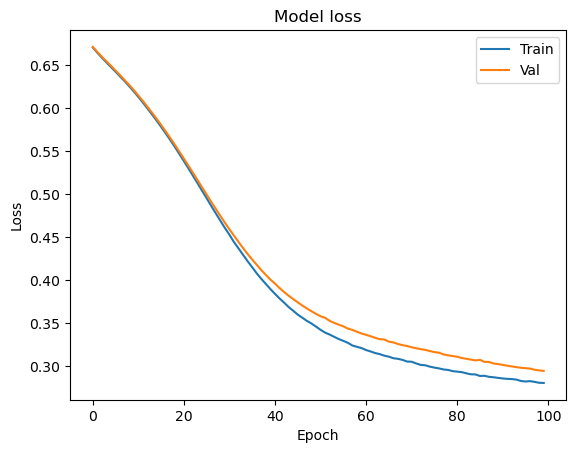

In [21]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

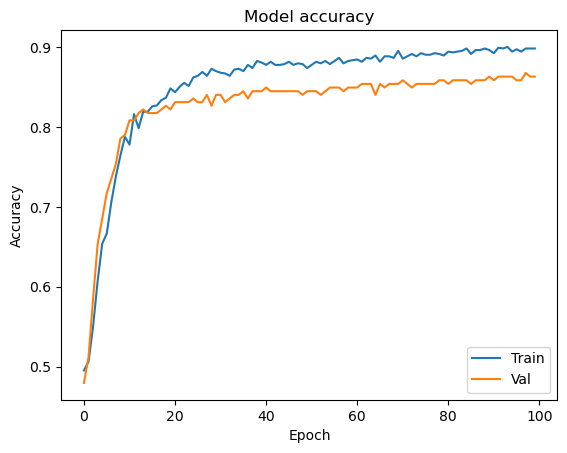

In [37]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [25]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [26]:
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [27]:
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 23ms/step - loss: 0.5110 - accuracy: 0.7828 - val_loss: 0.4895 - val_accuracy: 0.8037
Epoch 2/100
32/32 [==============================] - 1s 21ms/step - loss: 0.3826 - accuracy: 0.8415 - val_loss: 0.4208 - val_accuracy: 0.8539
Epoch 3/100
32/32 [==============================] - 1s 21ms/step - loss: 0.3278 - accuracy: 0.8728 - val_loss: 0.3586 - val_accuracy: 0.8539
Epoch 4/100
32/32 [==============================] - 1s 21ms/step - loss: 0.2988 - accuracy: 0.8826 - val_loss: 0.3414 - val_accuracy: 0.8447
Epoch 5/100
32/32 [==============================] - 1s 20ms/step - loss: 0.3018 - accuracy: 0.8777 - val_loss: 0.3262 - val_accuracy: 0.8539
Epoch 6/100
32/32 [==============================] - 1s 20ms/step - loss: 0.2742 - accuracy: 0.8943 - val_loss: 0.2918 - val_accuracy: 0.8584
Epoch 7/100
32/32 [==============================] - 1s 21ms/step - loss: 0.2460 - accuracy: 0.9022 - val_loss: 0.2817 - val_accuracy: 0.8721
Epoch 

32/32 [==============================] - 1s 20ms/step - loss: 0.1672 - accuracy: 0.9393 - val_loss: 0.3366 - val_accuracy: 0.8813
Epoch 59/100
32/32 [==============================] - 1s 21ms/step - loss: 0.1433 - accuracy: 0.9354 - val_loss: 0.4538 - val_accuracy: 0.8904
Epoch 60/100
32/32 [==============================] - 1s 20ms/step - loss: 0.1493 - accuracy: 0.9364 - val_loss: 0.3831 - val_accuracy: 0.8539
Epoch 61/100
32/32 [==============================] - 1s 19ms/step - loss: 0.1526 - accuracy: 0.9305 - val_loss: 0.3556 - val_accuracy: 0.8584
Epoch 62/100
32/32 [==============================] - 1s 20ms/step - loss: 0.1599 - accuracy: 0.9452 - val_loss: 0.3413 - val_accuracy: 0.8767
Epoch 63/100
32/32 [==============================] - 1s 20ms/step - loss: 0.1508 - accuracy: 0.9393 - val_loss: 0.3894 - val_accuracy: 0.8630
Epoch 64/100
32/32 [==============================] - 1s 19ms/step - loss: 0.1396 - accuracy: 0.9442 - val_loss: 0.4396 - val_accuracy: 0.8630
Epoch 65/100

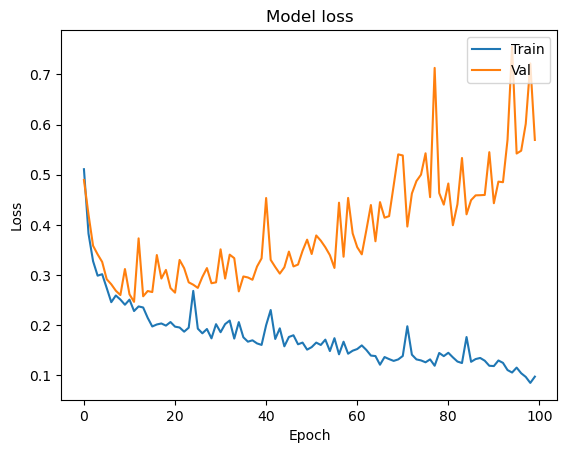

In [28]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

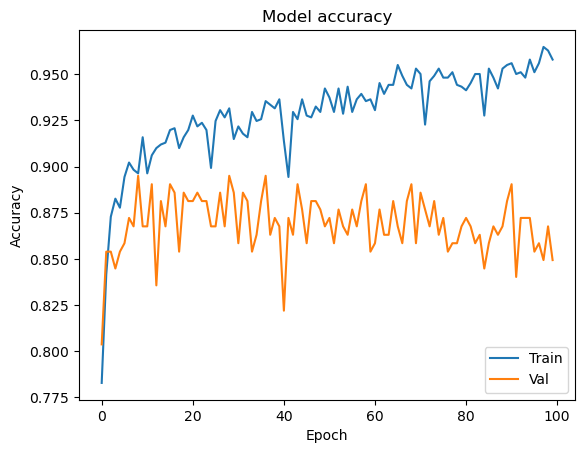

In [38]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [30]:
from keras.layers import Dropout
from keras import regularizers

In [31]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [32]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [33]:
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 27ms/step - loss: 14.2327 - accuracy: 0.6018 - val_loss: 3.9105 - val_accuracy: 0.8128
Epoch 2/100
32/32 [==============================] - 1s 26ms/step - loss: 1.7045 - accuracy: 0.8141 - val_loss: 0.7220 - val_accuracy: 0.8356
Epoch 3/100
32/32 [==============================] - 1s 24ms/step - loss: 0.5775 - accuracy: 0.8708 - val_loss: 0.5575 - val_accuracy: 0.8493
Epoch 4/100
32/32 [==============================] - 1s 24ms/step - loss: 0.5078 - accuracy: 0.8748 - val_loss: 0.5427 - val_accuracy: 0.8493
Epoch 5/100
32/32 [==============================] - 1s 22ms/step - loss: 0.5057 - accuracy: 0.8659 - val_loss: 0.5082 - val_accuracy: 0.8676
Epoch 6/100
32/32 [==============================] - 1s 24ms/step - loss: 0.4777 - accuracy: 0.8748 - val_loss: 0.5150 - val_accuracy: 0.8539
Epoch 7/100
32/32 [==============================] - 1s 23ms/step - loss: 0.4771 - accuracy: 0.8748 - val_loss: 0.4853 - val_accuracy: 0.8676
Epoch

32/32 [==============================] - 1s 25ms/step - loss: 0.4548 - accuracy: 0.8796 - val_loss: 0.4191 - val_accuracy: 0.8767
Epoch 59/100
32/32 [==============================] - 1s 26ms/step - loss: 0.4268 - accuracy: 0.8953 - val_loss: 0.4125 - val_accuracy: 0.8721
Epoch 60/100
32/32 [==============================] - 1s 25ms/step - loss: 0.4248 - accuracy: 0.8943 - val_loss: 0.4176 - val_accuracy: 0.8767
Epoch 61/100
32/32 [==============================] - 1s 24ms/step - loss: 0.4264 - accuracy: 0.8982 - val_loss: 0.4138 - val_accuracy: 0.8904
Epoch 62/100
32/32 [==============================] - 1s 24ms/step - loss: 0.4398 - accuracy: 0.8845 - val_loss: 0.4150 - val_accuracy: 0.8676
Epoch 63/100
32/32 [==============================] - 1s 24ms/step - loss: 0.4304 - accuracy: 0.8836 - val_loss: 0.4144 - val_accuracy: 0.8858
Epoch 64/100
32/32 [==============================] - 1s 24ms/step - loss: 0.4222 - accuracy: 0.9022 - val_loss: 0.4084 - val_accuracy: 0.8767
Epoch 65/100

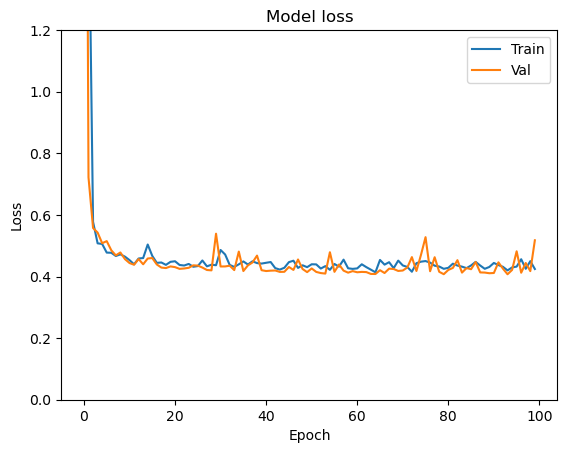

In [34]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

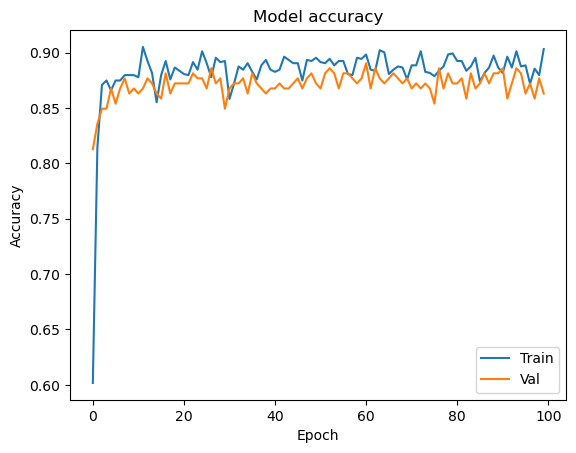

In [39]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()